In [47]:
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import numpy as np
from numpy.random import seed, randint

In [48]:
seed(504)
tf.random.set_seed(504)

# Getting the data

This digit is 0


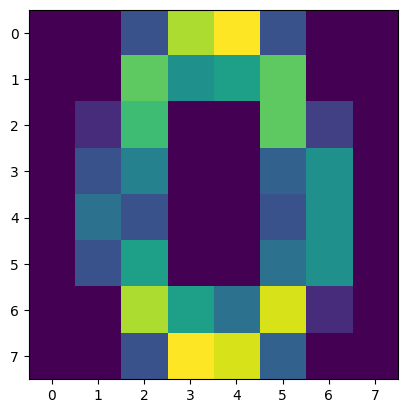

In [49]:
digits = load_digits()

a = randint(low = 0, high = len(digits.data) - 1)
plt.imshow(digits.images[a])
print("This digit is {}".format(digits.target[a]))

# Training the neural network

In [50]:
num_classes = 10
X = digits.data
y = digits.target
Y = tf.keras.utils.to_categorical(y, num_classes)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y)
input_size = X.shape[1]

In [51]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 10)

model = tf.keras.models.Sequential([
    layers.Dense(units = 16, activation = 'tanh', input_dim = input_size, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(units = num_classes, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005), metrics = ['accuracy'])

history = model.fit(X_train, Y_train, 
                    epochs = 100, 
                    validation_split = 0.2, 
                    callbacks = [callback])

Epoch 1/100
34/34 [==============================] - 0s 5ms/step - loss: 2.1255 - accuracy: 0.2553 - val_loss: 1.6984 - val_accuracy: 0.4407
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 1.5072 - accuracy: 0.5070 - val_loss: 1.2386 - val_accuracy: 0.6926
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 1.1442 - accuracy: 0.6787 - val_loss: 0.9352 - val_accuracy: 0.7852
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.9002 - accuracy: 0.7577 - val_loss: 0.7742 - val_accuracy: 0.8259
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7585 - accuracy: 0.8022 - val_loss: 0.6558 - val_accuracy: 0.8370
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.8171 - val_loss: 0.5599 - val_accuracy: 0.8556
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.8570 - val_loss: 0.5027 - val_accuracy: 0.8704
Epoch 8/100
3

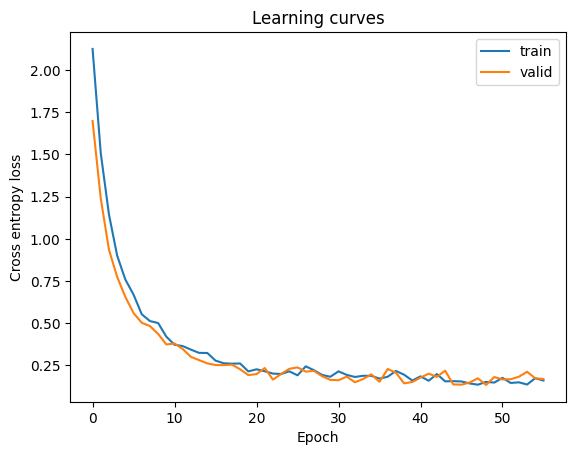

In [52]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

In [53]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, Y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

43/43 [==============================] - 0s 1ms/step - loss: 0.0961 - accuracy: 0.9807
Loss + accuracy on train data: [0.0961131900548935, 0.9806978702545166]
15/15 [==============================] - 0s 999us/step - loss: 0.2029 - accuracy: 0.9489
Loss + accuracy on test data: [0.202861025929451, 0.948888897895813]


# Consider misclassified digits

In [54]:
probabilities = np.array(model.predict(X_test))
predictions = np.argmax(probabilities, axis = 1) #what does the model predict
labels = np.argmax(Y_test, axis = 1) #what are the actual labels

print("Predictions = {}".format(predictions[0:30]))
print("Labels      = {}".format(labels[0:30]))

15/15 [==============================] - 0s 929us/step
Predictions = [0 1 6 8 1 0 4 1 7 8 9 5 9 2 6 9 3 6 9 3 9 8 4 7 7 5 3 8 2 6]
Labels      = [0 1 6 8 1 0 4 1 7 8 9 5 9 2 6 9 3 6 9 3 9 8 4 7 7 5 3 8 2 6]


This digit is 1, but classified as 4.


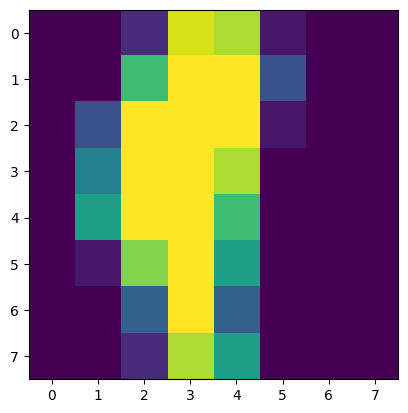

In [55]:
misclas_idxs = np.argwhere(predictions != labels)

b = randint(low = 0, high = len(misclas_idxs) - 1) #choose a random index
a = misclas_idxs[b][0] # find out what image that index is
plt.imshow(np.reshape(X_test[a], (8,8)))
print("This digit is {}, but classified as {}.".format(labels[a], predictions[a]))